In [5]:
'''
KT 데이터를 통한 외국인 생활인구 파악을 위한 전처리 및 시각화
'''
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#import tensorflow as tf
import seaborn as sns
#%matplotlib inline
file_dir = "C:\\Users\Youngju Hong\Documents\projectfile\유동인구"
file_dir_mac = "/Users/hong/OneDrive - ./서울연구원_데이터"
types = ""

In [6]:
def isworkinghour(x):
    temp = x[f"tt{types}"]
    if temp < 9 or temp >= 18: return False
    else: return True
    
def isworkinghour(x):
    temp = x[f"tt{types}"]
    if temp < 9 or temp >= 18: return False
    else: return True

def isworkday(x):
    if x[f"weekday"] >= 5: return False
    else: return True

def isindistdictbycode(x):
    temp = x[f"h_gu_cd{types}"]
    if temp in distdictbycode:#retrieve district information from the table above
        return distdictbycode[temp]
    else: return temp
    

#get district code at mac

In [23]:
distcode = pd.read_csv("/Users/hong/OneDrive - ./projectfile/dongcode.csv")
distcode["gu"] = distcode["H_DNG_CD)"].apply(lambda x: str(x)[:4])
print(distcode.head())
gu_code_to_name = dict(zip(distcode["gu"], distcode["CT_NM"]))
dong_code_to_name = dict(zip(distcode["H_DNG_CD)"], d))
gu_code_to_name

   H_SDNG_CD  H_DNG_CD) DO_NM CT_NM H_DNG_NM    gu
0    1101053   11110530    서울   종로구      사직동  1111
1    1101054   11110540    서울   종로구      삼청동  1111
2    1101055   11110550    서울   종로구      부암동  1111
3    1101056   11110560    서울   종로구      평창동  1111
4    1101057   11110570    서울   종로구      무악동  1111


{'1111': '종로구',
 '1114': '중구',
 '1117': '용산구',
 '1120': '성동구',
 '1121': '광진구',
 '1123': '동대문구',
 '1126': '중랑구',
 '1129': '성북구',
 '1130': '강북구',
 '1132': '도봉구',
 '1135': '노원구',
 '1138': '은평구',
 '1141': '서대문구',
 '1144': '마포구',
 '1147': '양천구',
 '1150': '강서구',
 '1153': '구로구',
 '1154': '금천구',
 '1156': '영등포구',
 '1159': '동작구',
 '1162': '관악구',
 '1165': '서초구',
 '1168': '강남구',
 '1171': '송파구',
 '1174': '강동구'}

In [7]:
# get district code as dict type

district_code = pd.read_csv(f"{file_dir_mac}\행정동코드.csv")
district_code.columns = ["통계청코드", "행자부코드", "시도명", "구", "동"]
#1101053	11110530	서울	종로구	사직동

FileNotFoundError: [Errno 2] File b'/Users/hong/OneDrive - ./\xec\x84\x9c\xec\x9a\xb8\xec\x97\xb0\xea\xb5\xac\xec\x9b\x90_\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\\\xed\x96\x89\xec\xa0\x95\xeb\x8f\x99\xec\xbd\x94\xeb\x93\x9c.csv' does not exist: b'/Users/hong/OneDrive - ./\xec\x84\x9c\xec\x9a\xb8\xec\x97\xb0\xea\xb5\xac\xec\x9b\x90_\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\\\xed\x96\x89\xec\xa0\x95\xeb\x8f\x99\xec\xbd\x94\xeb\x93\x9c.csv'

In [10]:
district_code["구코드"] = district_code["행자부코드"].apply(lambda x: str(x)[:4])
district_code["주소"] = district_code[["구", "동"]].apply(lambda x: " ".join(x), axis = 1)
district_code["구코드"]
district_code_gu = dict(zip(district_code["구코드"], district_code["구"]))
district_code_dong = dict(zip(district_code["행자부코드"], district_code["동"]))
district_code_address = dict(zip(district_code["행자부코드"], district_code["주소"]))
hangja_to_tong = dict(zip(district_code["행자부코드"], district_code["통계청코드"]))

district_code.head()

,통계청코드,행자부코드,시도명,구,동,구코드,주소
0,1101053,11110530,서울,종로구,사직동,1111,종로구 사직동
1,1101054,11110540,서울,종로구,삼청동,1111,종로구 삼청동
2,1101055,11110550,서울,종로구,부암동,1111,종로구 부암동
3,1101056,11110560,서울,종로구,평창동,1111,종로구 평창동
4,1101057,11110570,서울,종로구,무악동,1111,종로구 무악동


In [11]:
data = pd.read_table(f"/Users/hong/OneDrive - ./projectfile/SE_SPOP_FORN_LONG_RESD_DONG_2020년1월-5월.txt", sep = ",")
#/Users/hong/OneDrive - ./projectfile
data["h_dng_cd"] = data["h_dng_cd"].astype('category')
#similar like lapply in R. axis = 0 stands for rows, and 1 stands for columns.
#apply method also gets anonymous function (lambda) as a variable

In [12]:
data["gu"] = data["h_dng_cd"].apply(lambda x: str(x)[:4])
data.head()

,ymd,tt,h_dng_cd,fornlong_spop,chn,vnm,usa,jpn,can,twn,etcsum,gu
0,20200101,0,11110515,204.3423,81.5946,0.0238,52.6440,5.9314,15.6232,0.0037,48.5216,1111
1,20200101,0,11110530,996.7482,234.0191,14.8886,183.3293,34.7678,50.3823,12.4711,466.8905,1111
2,20200101,0,11110540,168.6856,43.7797,13.9304,48.6421,6.5842,0.3645,13.3380,42.0469,1111
3,20200101,0,11110550,437.9146,245.3211,4.4483,88.1657,0.0000,29.5340,9.6511,60.7944,1111
4,20200101,0,11110560,380.7847,116.9250,4.4532,120.6092,10.7719,24.8353,26.4001,76.7901,1111


In [19]:
data_by_gu_tt = data.groupby(by = ["gu", "tt"])["fornlong_spop", "chn", "vnm", "usa", "jpn", "can", "twn", "etcsum"].mean().reset_index()
data_by_gu_tt.head()

print(data_by_gu_tt.dtypes)

gu                object
tt                 int64
fornlong_spop    float64
chn              float64
vnm              float64
usa              float64
jpn              float64
can              float64
twn              float64
etcsum           float64
dtype: object


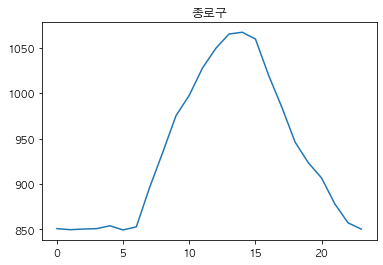

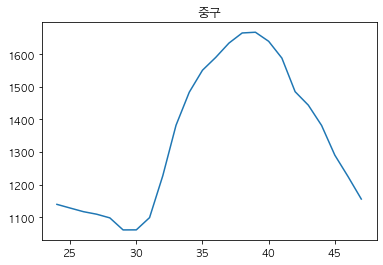

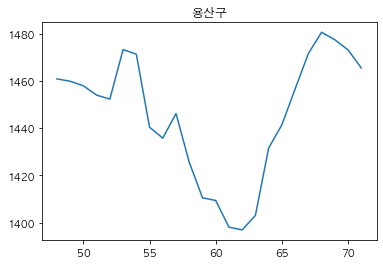

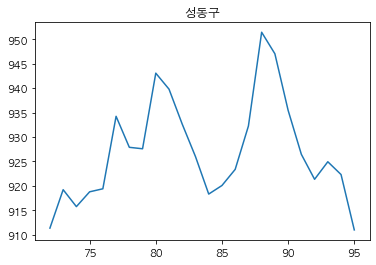

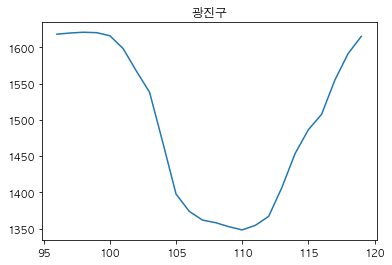

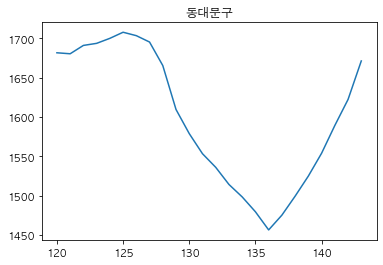

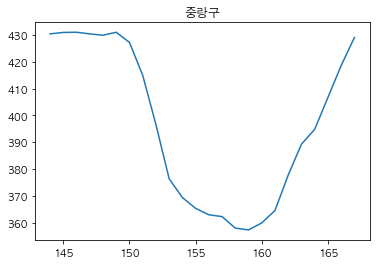

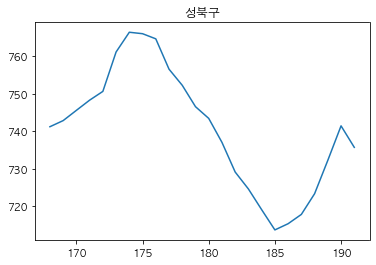

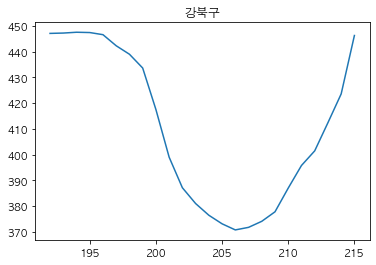

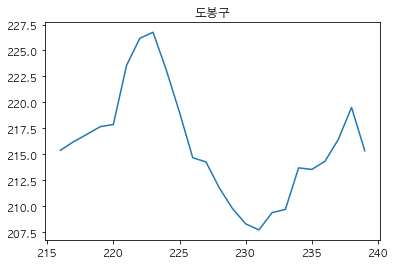

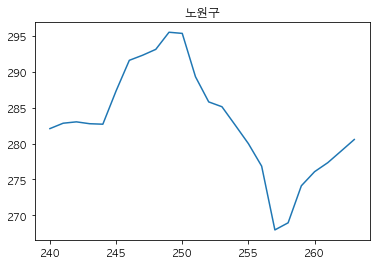

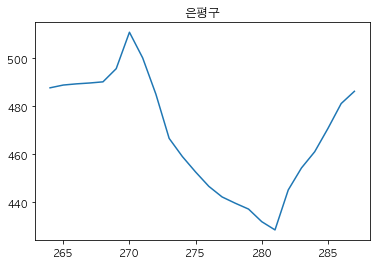

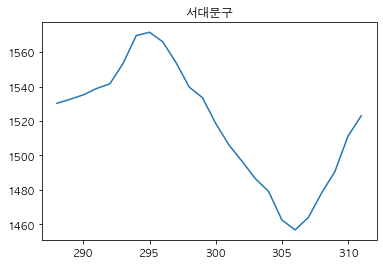

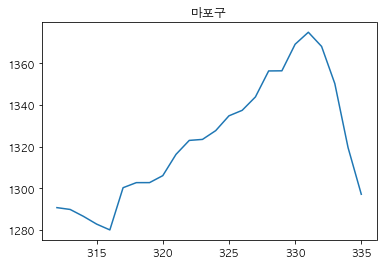

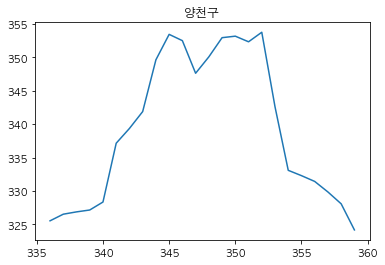

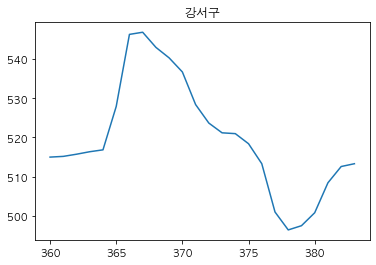

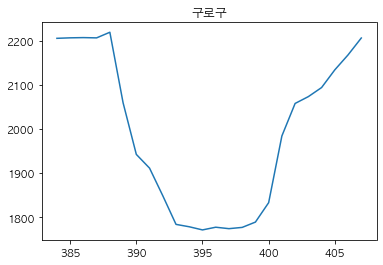

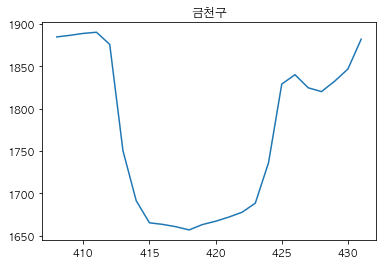

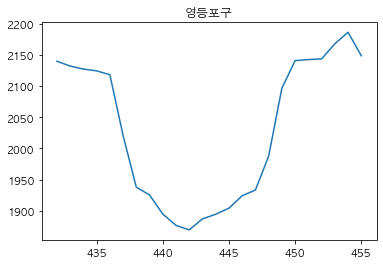

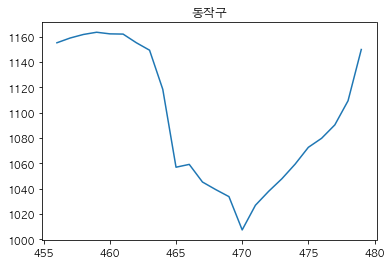

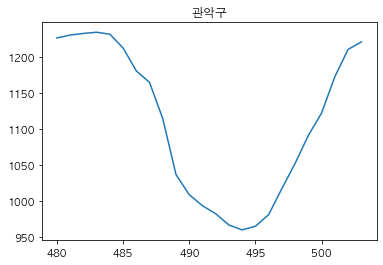

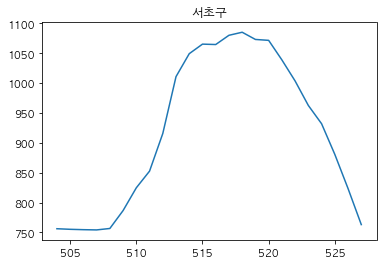

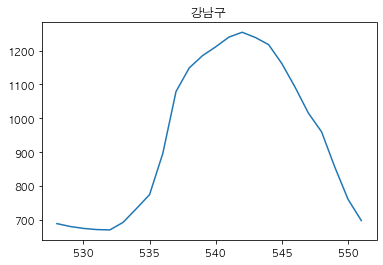

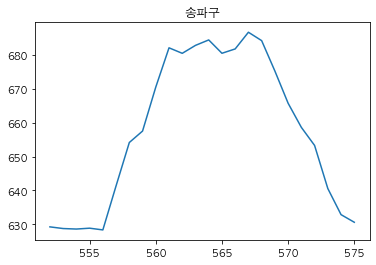

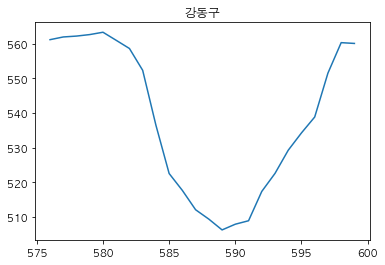

In [22]:
for i in data_by_gu_tt["gu"].unique():
    plt.rc("font", family = 'AppleGothic')#unit of figsize: inch
    plt.plot(data_by_gu_tt[data_by_gu_tt["gu"] == i].loc[:,"fornlong_spop"])
    plt.title(gu_code_to_name[i])
    plt.show()
    #plt.savefig(f"{i}.png", dpi= 50) #save as file
    

In [31]:
data_by_gu_tt["gu"].unique()[4]

'1121'

In [12]:
#eliminating population data of holidays
#date processing
fdata_living["workhour"] = fdata_living.apply(isworkinghour, axis = 1) #for working hour
fdata_living["ymd_living"] = pd.to_datetime(fdata_living["ymd_living"], format = "%Y%m%d")

In [7]:
fdata_living["weekday"] = fdata_living["ymd_living"].dt.weekday # get day
fdata_living["workday"] = fdata_living.apply(isworkday, axis = 1)

fdata_living = fdata_living.rename(columns = {"ymd_living": "ymd", "tt_living": "tt", "h_dng_cd_living": "h_dng_cd"})

In [8]:
#set all the workday as workhour as "False" if the day is a national holiday
korholiday = list(map(str, [101,124,125,126,301,430,501,505]))

for idx in korholiday: # public holidays
    temp = (fdata_living["ymd"] == f"2020-0{idx[0]}-{idx[1:]}")
    fdata_living["workday"][temp] = False
    fdata_living["workhour"][temp] = False

    



C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Youngju Hong\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
fdata_living["h_gu_cd"] = fdata_living["h_dng_cd"].apply(lambda x: int(str(x)[:4]))
fdata_living["address"] = fdata_living["h_dng_cd"].apply(lambda x: district_code[])

SyntaxError: invalid syntax (<ipython-input-9-39776664824d>, line 2)

In [ ]:
#fdata_living_without_holiday = fdata_living[fdata_living["workday"] == True]
fdata_living[(fdata_living["h_dng_cd"] == 11110515) & (fdata_living["tt"] == 12)]

In [ ]:
#주민등록인구
foreign_registered_data = pd.read_table(f"{file_dir}foreign_reg_population.txt")
foreign_registered_data = foreign_registered_data.replace({',': '', ' ': '', '-': 0}, regex = True)
foreign_registered_data.columns = foreign_registered_data.columns.str.replace(' ', '')
foreign_registered_data = foreign_registered_data[foreign_living_data["성별"] == "계"]

In [ ]:
#foreign_living_data (주민등록인구) 데이터 처리
foreign_living_data["chn_reg"] = foreign_living_data.loc[:, ["한국계중국인","중국(한국계중국인제외)"]].astype(float).sum(axis = 1) #형변환
foreign_data_revised = foreign_living_data[["자치구", "합계", "미국", "타이완", "일본", "베트남", "캐나다", "chn_reg"]] #특정 열 선택
foreign_data_revised
foreign_data_revised = foreign_data_revised.rename({"미국": "usa_reg", "타이완": "twn_reg", "일본": "jpn_reg", "캐나다": "can_reg", "베트남": "vnm_reg"}, axis = 1)
foreign_data_revised["major_sum"] = foreign_data_revised.loc[:,"usa_reg":"chn_reg"].astype(float).sum(axis = 1)
foreign_data_revised["etcsum"] = foreign_data_revised["합계"].astype(float).subtract(foreign_data_revised["major_sum"])
foreign_data_revised = foreign_data_revised.rename(columns = {"자치구": "gu", "etcsum": "etcsum_reg"})
foreign_data_revised

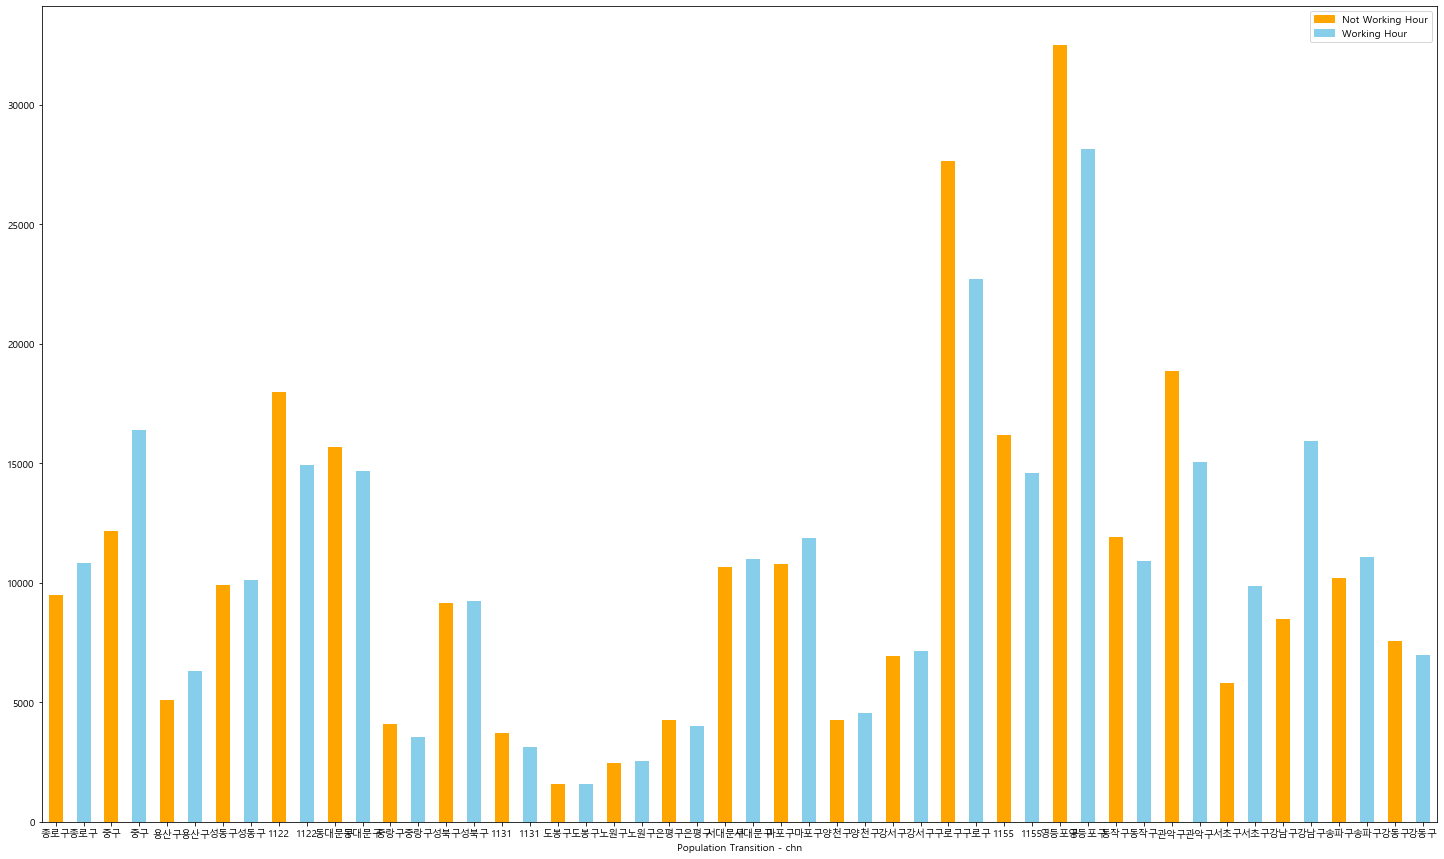

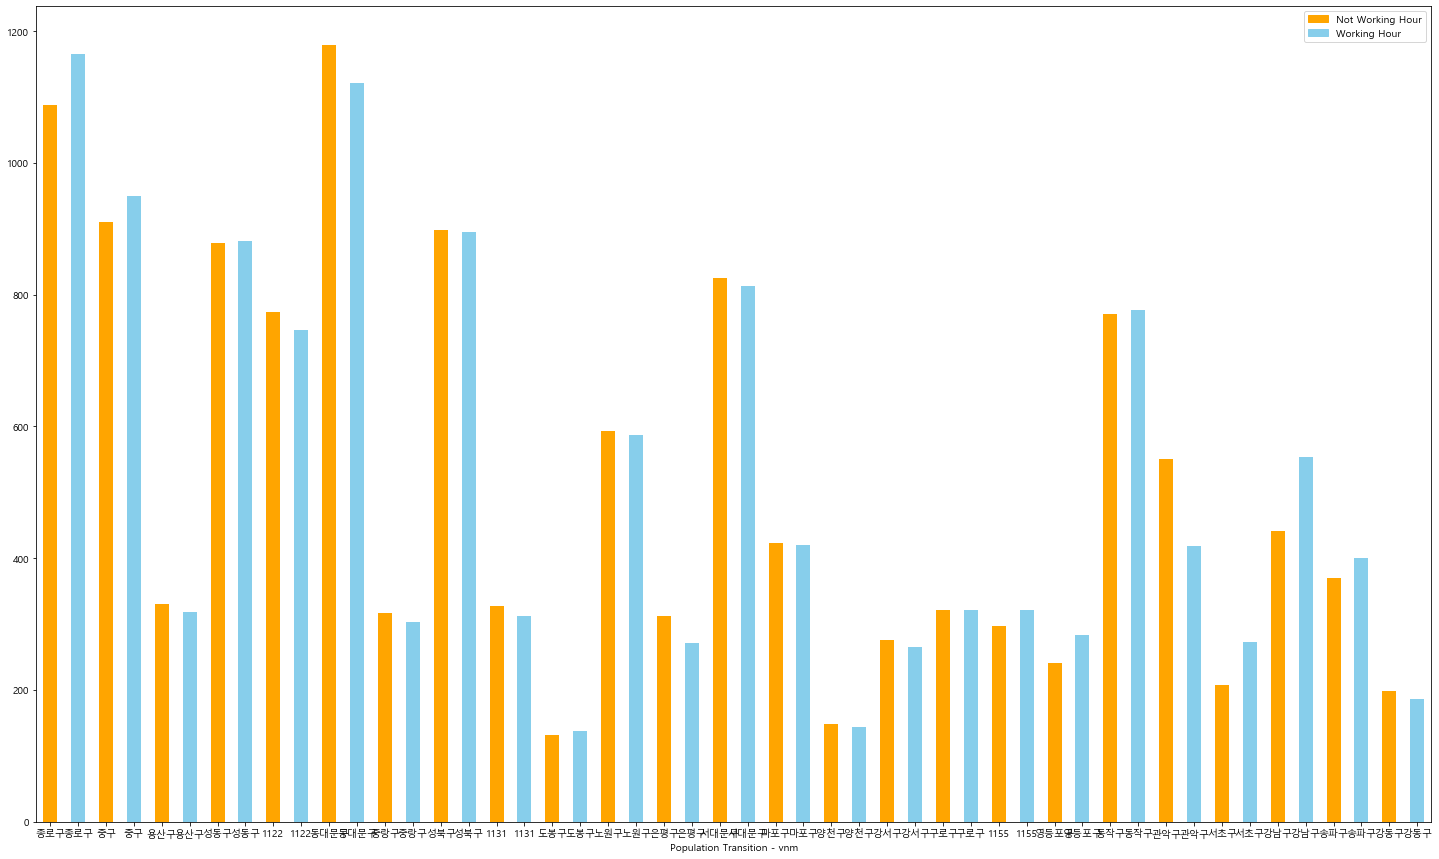

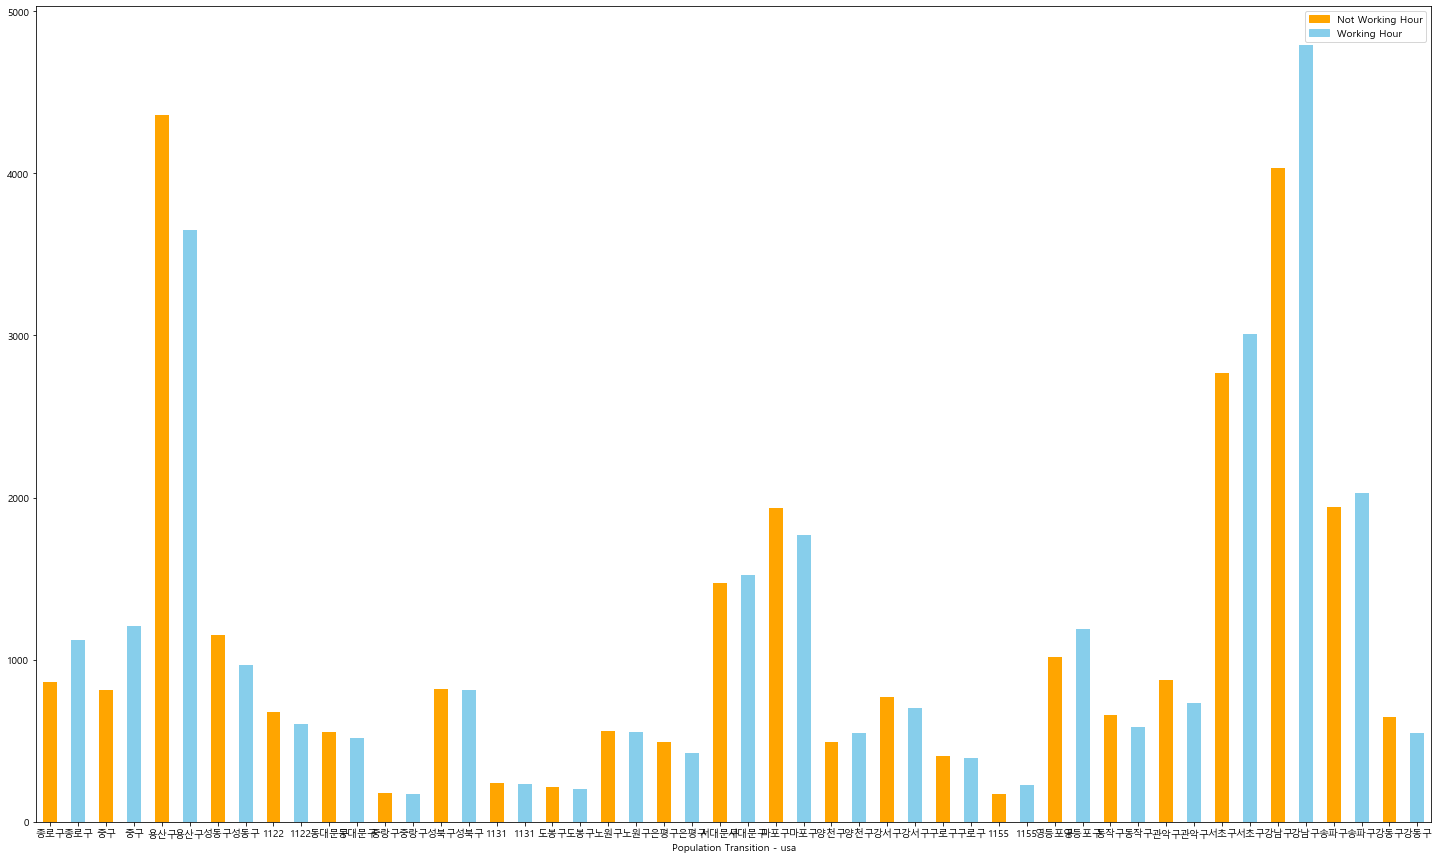

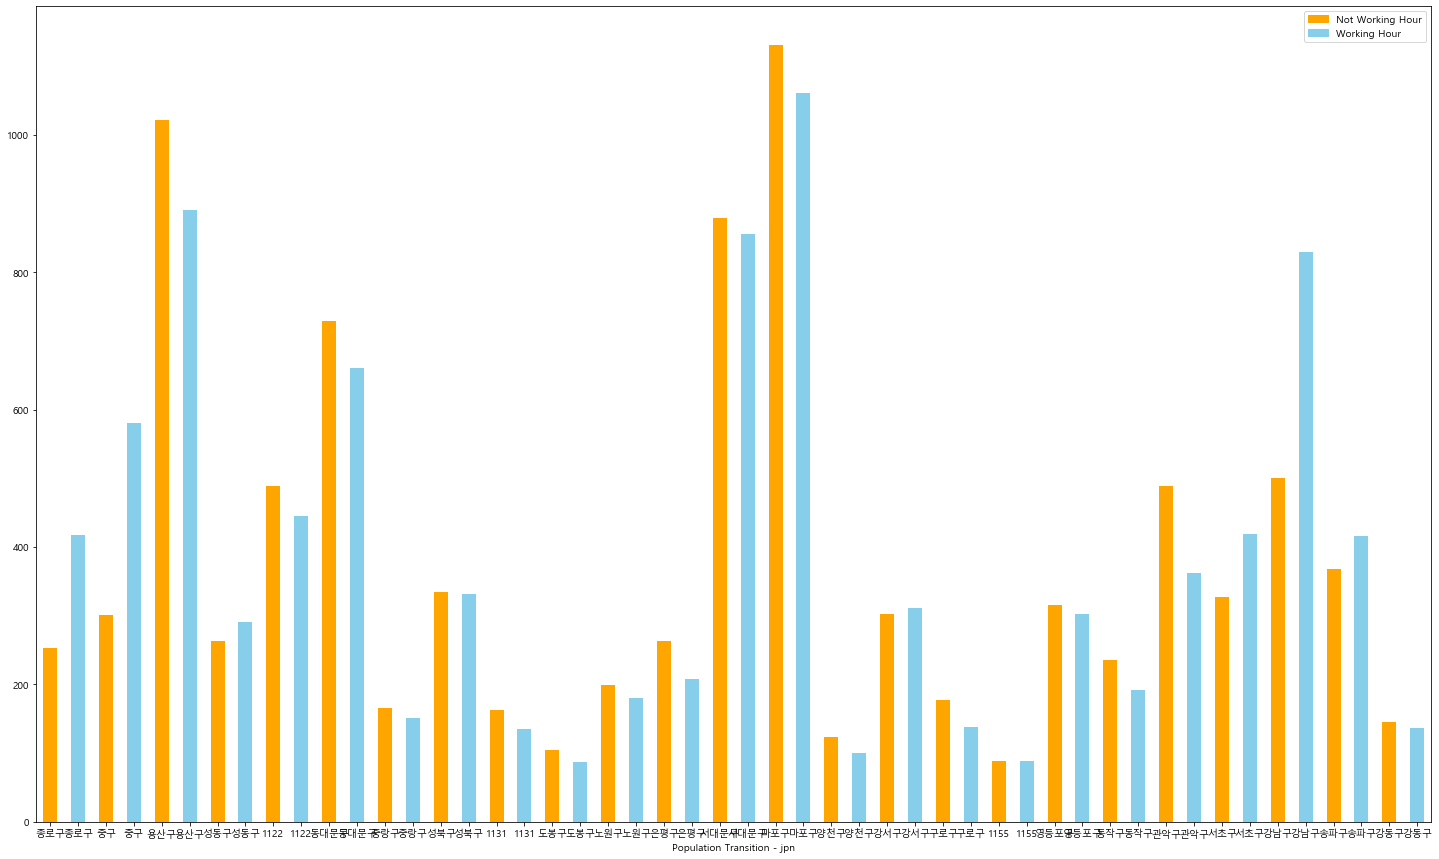

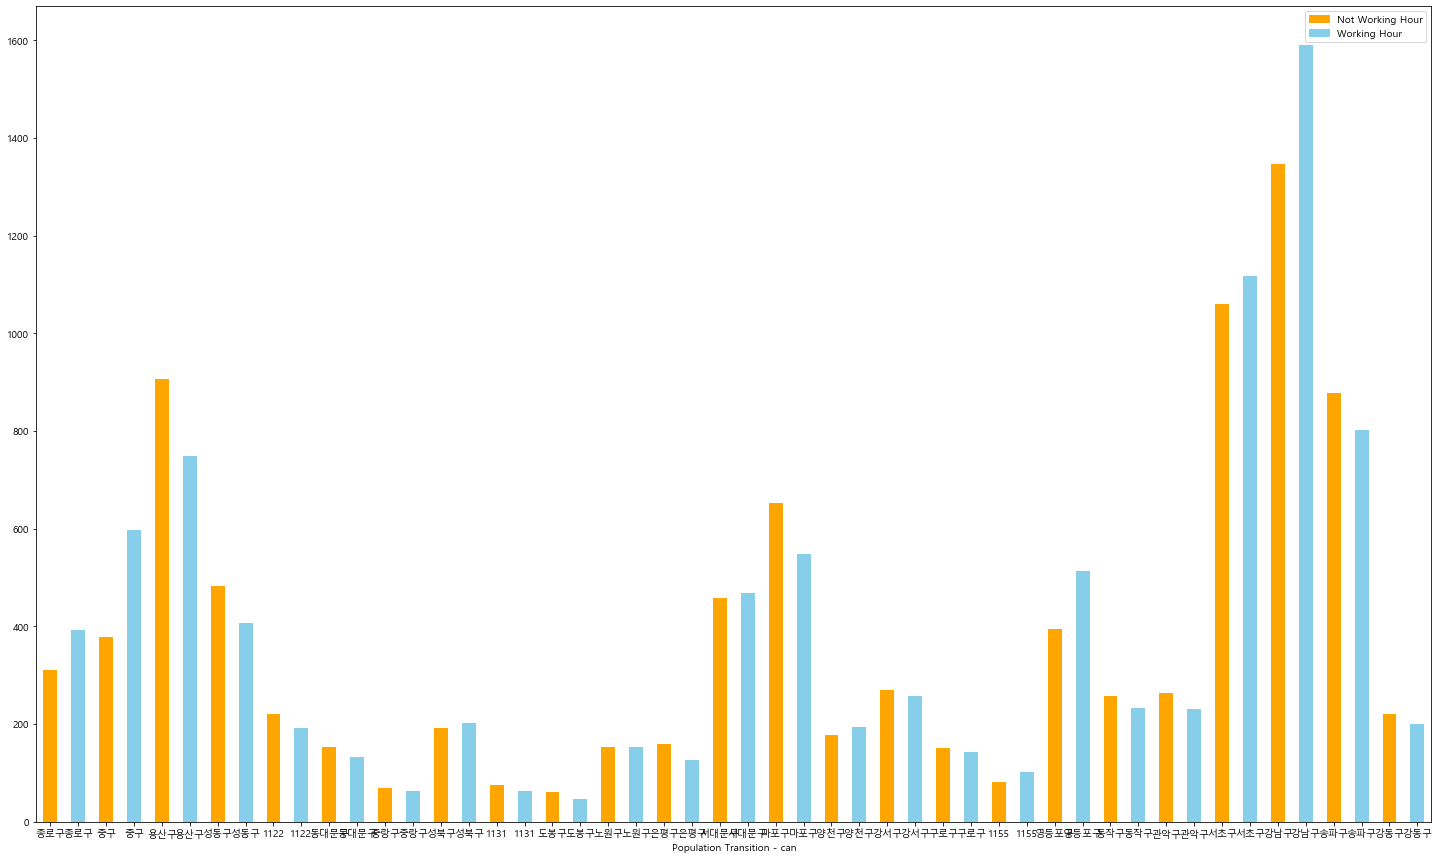

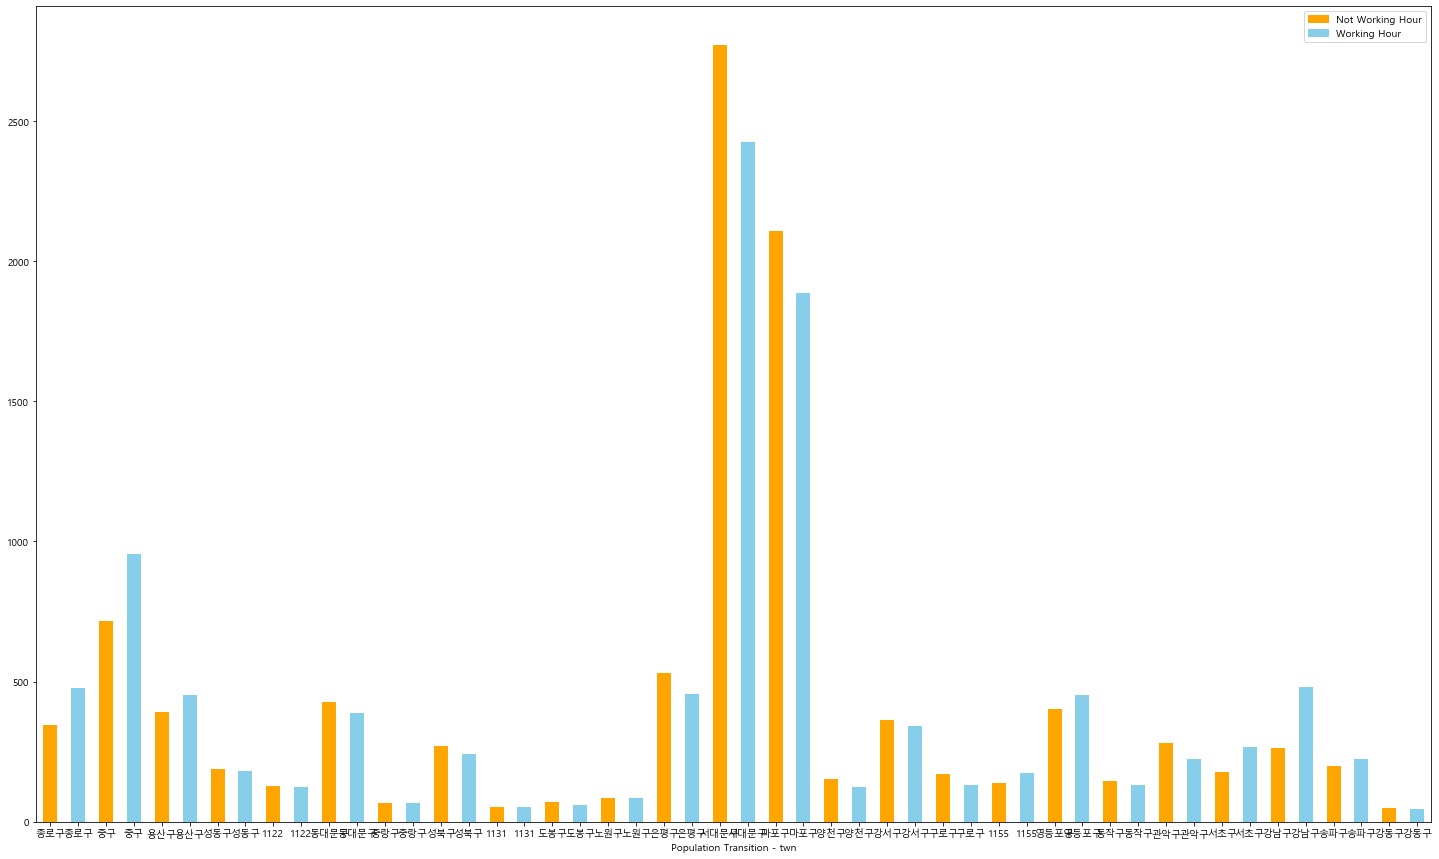

In [34]:
#Data Visualization
nations = ["chn","vnm","usa","jpn","can","twn"]

for nation in nations:
    test = meanpopulation[["gu", "workhour", nation]]
    x = test.plot(kind = "bar", x = "gu", y = nation, rot = 0, color = ["orange", "skyblue"], legend = False, figsize = (25, 15))
    #plt.text(0.3, 0.3, '한글', size=100) #Font Adjustment for Hangul
    plt.rc("font", family = "Malgun Gothic")#unit of figsize: inch
    plt.xlabel(f"Population Transition - {nation}") #labels (plt.ylabel for y axis)
    plt.legend(handles = [mpatches.Patch(color = "orange", label = "Not Working Hour"),\
                         mpatches.Patch(color = "skyblue", label = "Working Hour")]) #legends
    plt.savefig(f"Workinfo_{nation}.png", dpi = 500) #save as file


In [19]:
df = meanpopulation[nations + ["gu_hour"]]
df = df.melt(id_vars = "gu_hour", var_name = "nationality", value_name = "value")
df = df.sort_values(by = ['gu_hour'])
df.columns

Index(['gu_hour', 'nationality', 'value'], dtype='object')

100    usa
150    jpn
200    can
250    twn
50     vnm
      ... 
149    usa
199    jpn
99     vnm
249    can
299    twn
Name: nationality, Length: 250, dtype: object
50


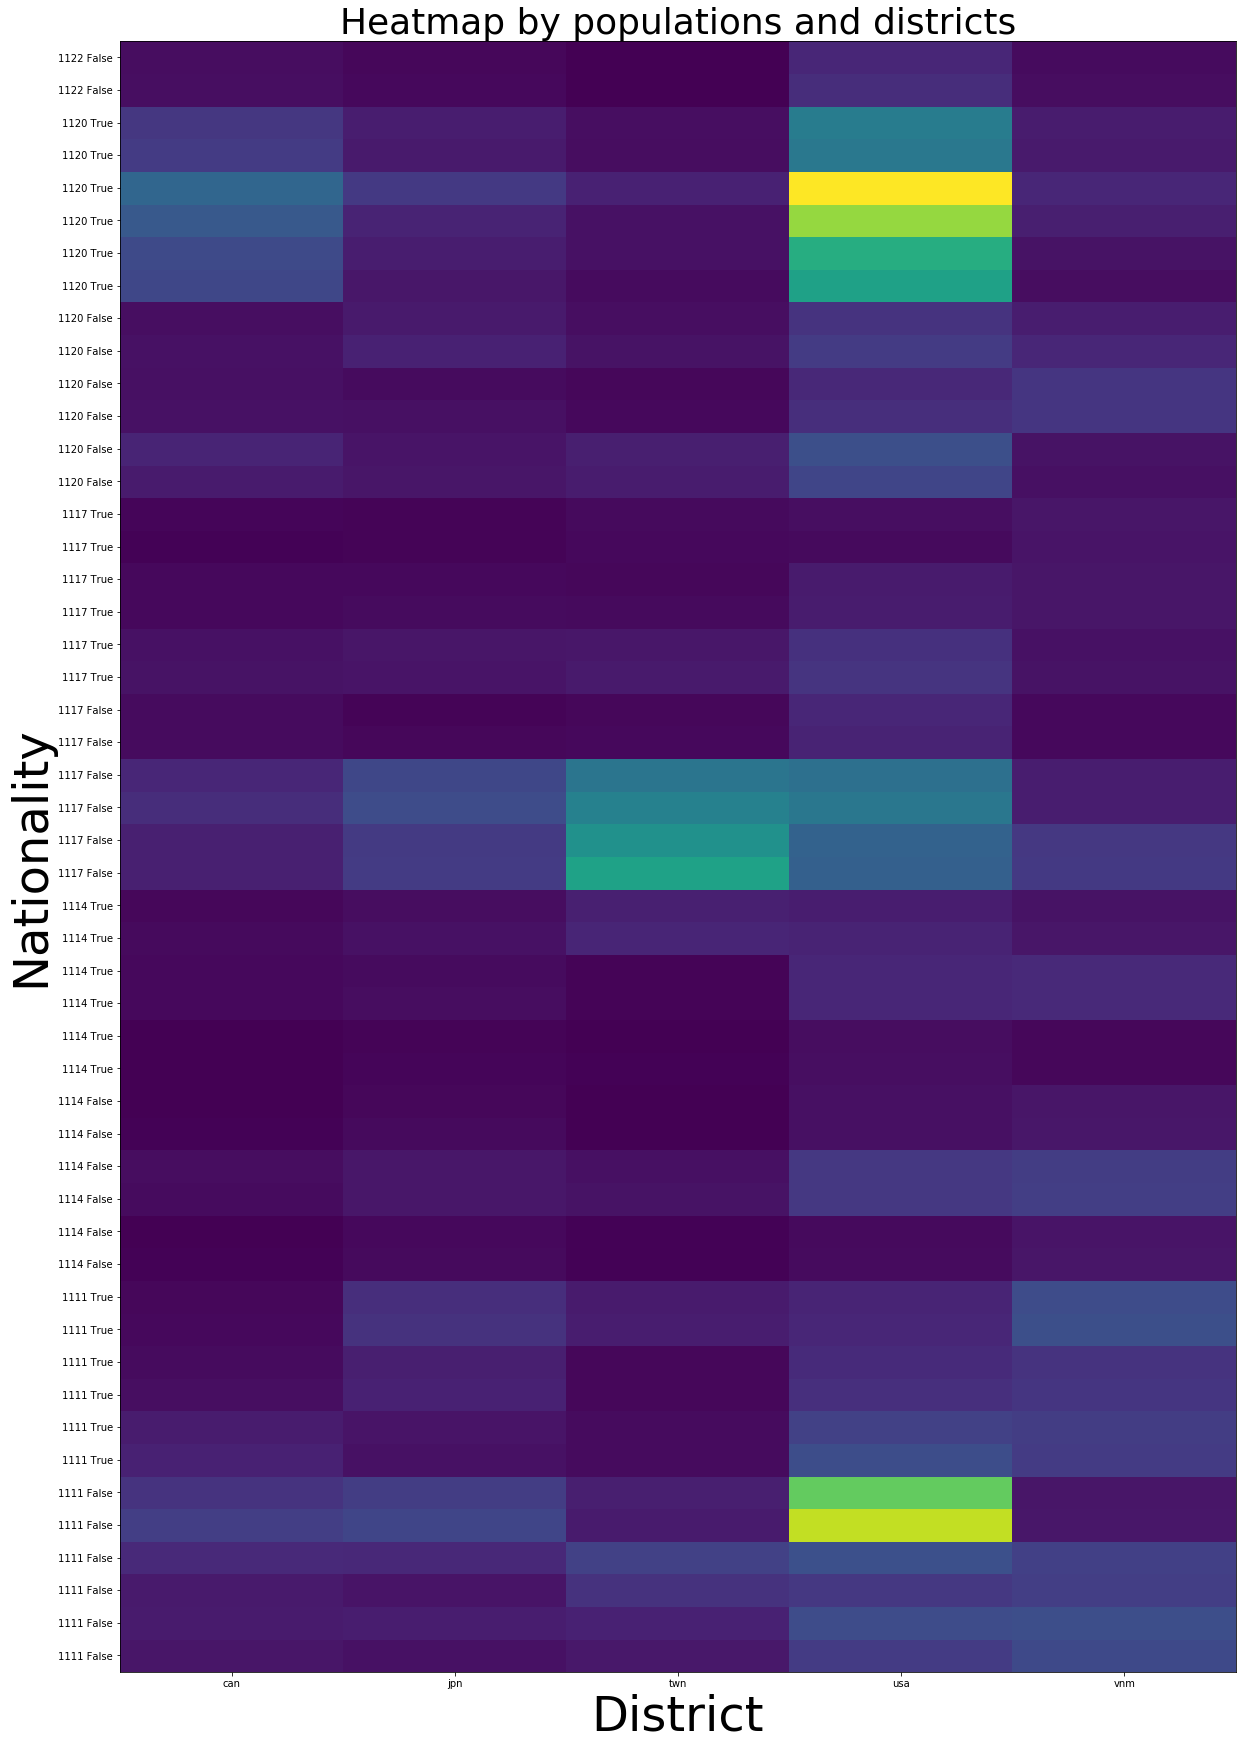

In [20]:
#sns.heatmap(df.pivot("gu_hour", "nationality", "value"))
df_no_roach = df[df["nationality"] != "chn"]
#print(df_no_roach[df_no_roach["nationality"] == "chn"])
print(df_no_roach["nationality"])
mpl.pyplot.figure(figsize = (20, 30))

df["gu_hour"] = df["gu_hour"].astype('category')
df["nationality"] = df["nationality"].astype('category')

print(len(df["gu_hour"].unique()))

plt.pcolor(df_no_roach.pivot("gu_hour", "nationality", "value"))
plt.xticks(np.arange(0.5, 5, 1), ['can', 'jpn', 'twn', 'usa', 'vnm'])
plt.yticks(np.arange(0.5, len(df_no_roach["gu_hour"].unique()), 1), df["gu_hour"])
plt.title("Heatmap by populations and districts", fontsize = 36)
plt.xlabel("District", fontsize = 48)
plt.ylabel("Nationality", fontsize = 48)
plt.savefig("heatmap.png", dpi = 1000) #save as file

<bound method Series.to_frame of 0   h_gu_cd        1111
    workhour      False
    chn         9504.88
    vnm         1087.41
    usa         862.773
                 ...   
49  twn         45.2474
    etcsum      1069.79
    forsum      9142.88
    workday        True
    gu              강동구
Length: 600, dtype: object>